In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [2]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [3]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [4]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(np.int64(0), np.int64(1)), mean=np.float64(0.39738988580750406), variance=np.float64(0.23954932085067235), skewness=np.float64(0.41936632478193103), kurtosis=np.float64(-1.824131885638896))

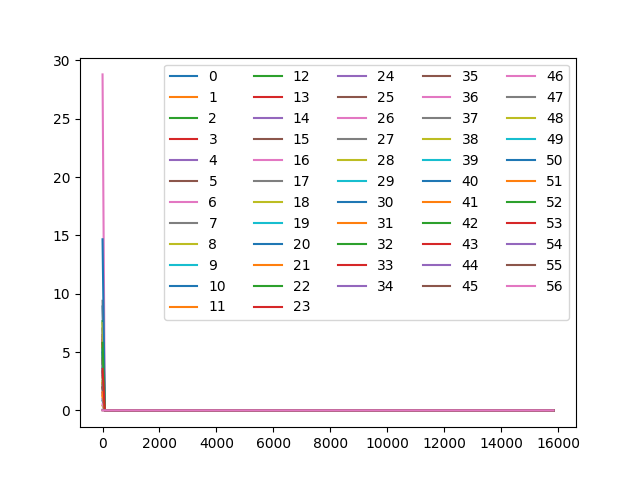

In [5]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

In [6]:
#check what is the highest value among all the features and to which feature it corresponds
print(f'Maximal value: {X.max()}')
print(f'Located in feature: {np.unravel_index(np.argmax(X), X.shape)}')

# Get the top 20 values using the flattened indices
top_indices = np.argsort(X, axis=None)[-20:]
top_values = X.flatten()[top_indices]
print("Top 20 values:", top_values)

Maximal value: 15841.0
Located in feature: (np.int64(1005), np.int64(56))
Top 20 values: [ 3168.  3210.  3220.  3243.  3269.  3271.  3318.  3327.  3334.  3337.
  3467.  3498.  3525.  3752.  4128.  5902.  9163.  9989. 10062. 15841.]


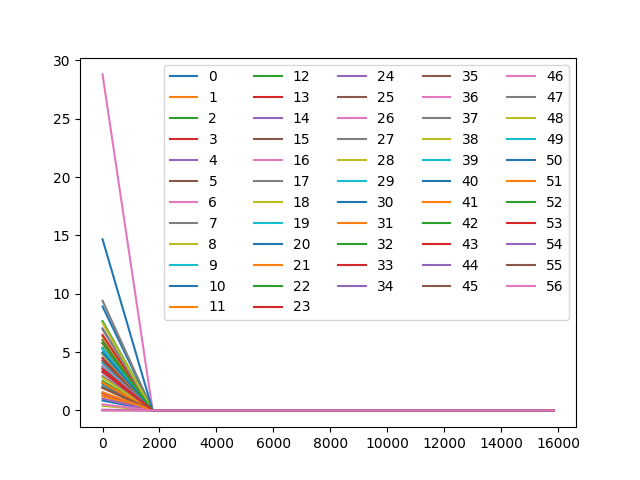

In [7]:
# this plots is not really helpful; go now explore further
nextplot()
xs = np.linspace(0, np.max(X), 10)
#print(xs)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

In [8]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
# for each feature, we will need mean and standard deviation
means_train = np.mean(X, axis=0)
stds_train = np.std(X, axis=0)

# apply Z-score normalization accroding to the formula
Xz = (X - means_train) / stds_train

# we normalize test data with statistics calculated on train set 
Xtestz = (Xtest - means_train) / stds_train

In [9]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
print(np.round(np.mean(Xz, axis=0), 5))  # should be all 0
print(np.var(Xz, axis=0))  # should be all 1
print(np.round(np.mean(Xtestz, axis=0), 5))  # what do you get here?
print(np.var(Xtestz, axis=0))

np.sum(Xz ** 3)  # should be: 1925261.15

[ 0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0. -0. -0.
 -0.  0.  0.  0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0. -0.  0.
 -0.  0. -0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0.05736 -0.03374  0.04025  0.00551 -0.02512  0.00167  0.0053  -0.01389
  0.01298 -0.01008  0.0268   0.01468  0.01285  0.09342 -0.01717  0.06178
 -0.03084 -0.01027  0.00149  0.06824 -0.02452 -0.00454 -0.00313  0.04098
  0.03765  0.01155 -0.00373  0.06558 -0.04822  0.02441  0.01644 -0.01815
  0.02471 -0.01612  0.01757 -0.01337 -0.04402  0.01112  0.0241  -0.01062
 -0.02062  0.00062 -0.03451  0.04246 -0.01593  0.0001   0.00685  0.00538
  0.00789  0.00681 -0.02972  0.01238 -0.03826 -0.05299  0.03199 -0.00682
  0.00535]
[0.61068019 0.64746339 1.25293677 1.2774661  1.08119249 1.31173762
 1.

np.float64(1925261.1560010156)

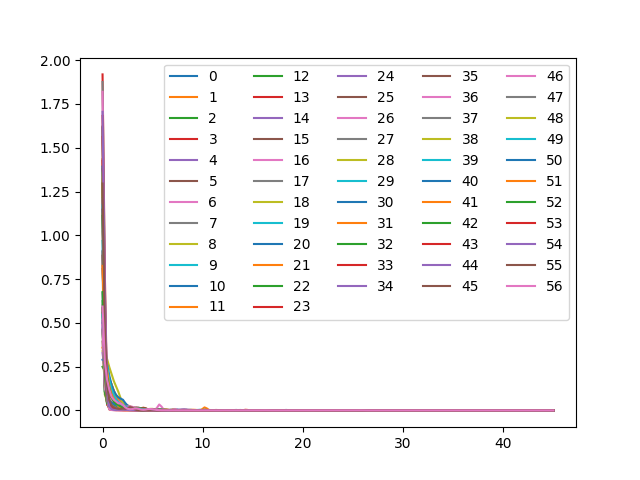

In [10]:
# Explore the normalized data
# YOUR CODE HERE
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
X_scaled = scaler.fit_transform(X)

In [13]:
!pip install seaborn

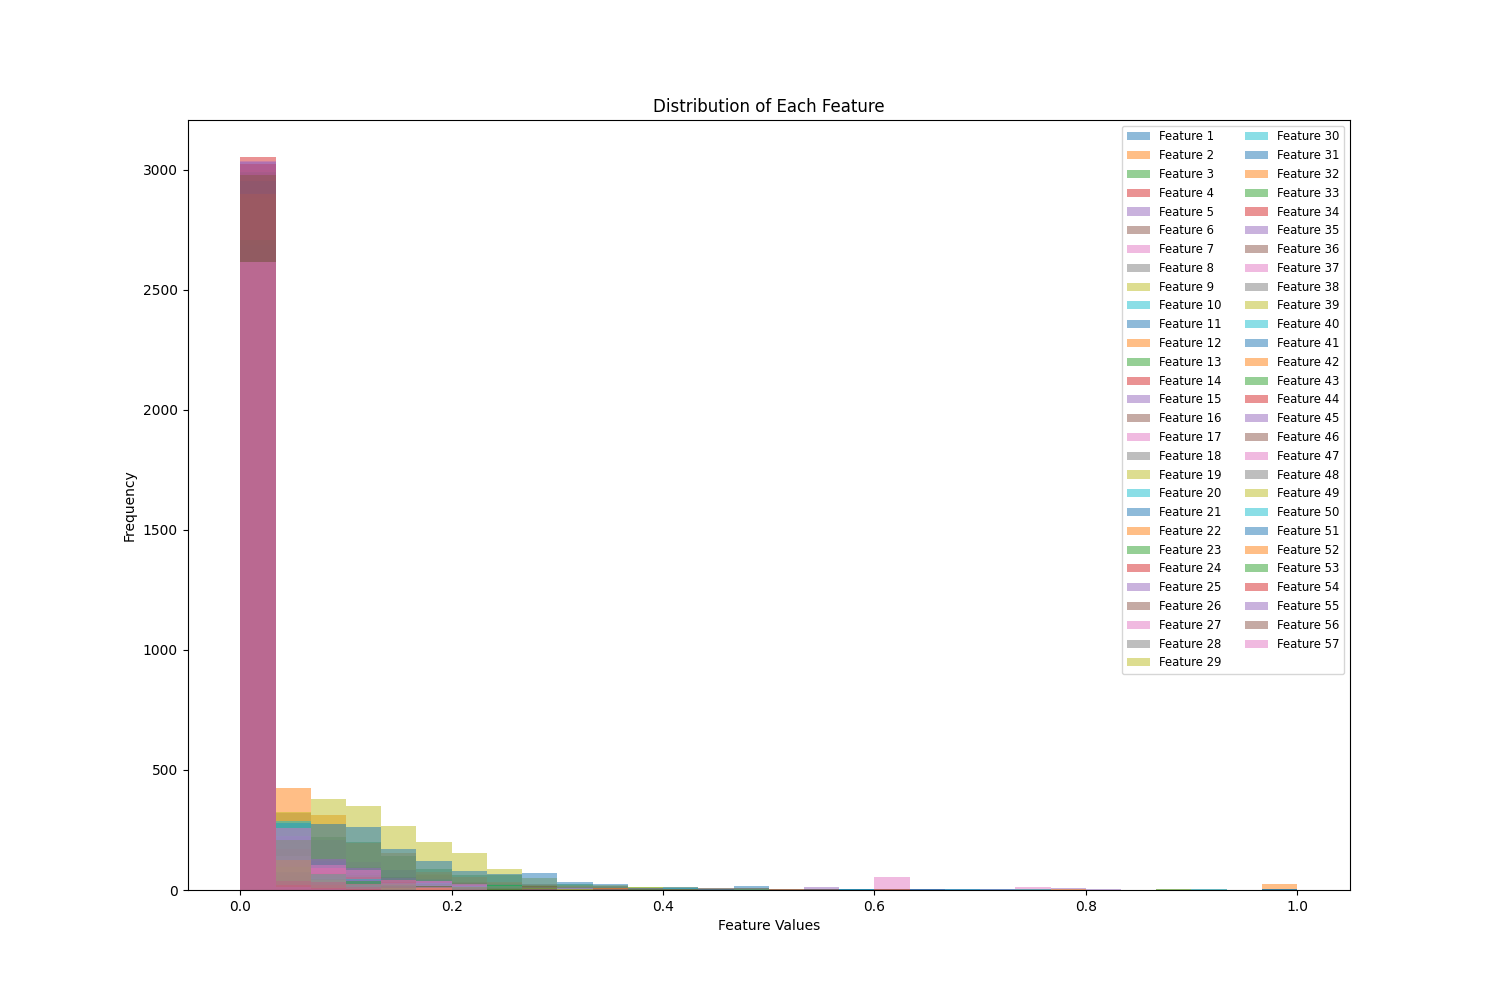

In [15]:
plt.figure(figsize=(15, 10))

# Plot histograms for each feature in Xtrain
for i in range(X_scaled.shape[1]):
    plt.hist(X_scaled[:, i], bins=30, alpha=0.5, label=f'Feature {i+1}')

# Add labels and legend
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Distribution of Each Feature')
plt.legend(loc='upper right', ncol=2, fontsize='small')  # Adjust for readability
plt.show()

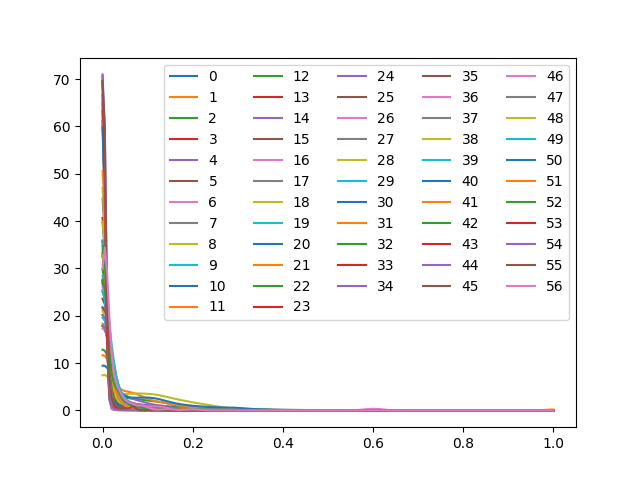

In [16]:
nextplot()
densities = [scipy.stats.gaussian_kde(X_scaled[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X_scaled), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

# 2. Maximum Likelihood Estimation

## Helper functions

In [17]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [18]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

In [19]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]


[np.float64(0.5), array([0.26894142, 0.5       , 0.73105858])]

In [20]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # YOUR CODE HERE
    return np.log(sigma(x))

In [21]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[np.float64(-0.6931471805599453),
 array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

In [22]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    log_likelihood = np.sum(y * logsigma( X @ w) + (1-y) * logsigma(- X @ w))
    


    return log_likelihood

In [23]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))


np.float64(-47066.64166782577)

In [26]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """

    # getting the error vector
    e = y - sigma(X @ w)
    
    
    # computing the gradient
    gradient = e.T @ X
    #gradient = X.T @ e
    
    return gradient

In [27]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [28]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [29]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # computing the negative log likelihood
        return -l(y, X, w)

    def update(w, eps):
        # computing the update 
        return w + eps * dl(y, X, w)
    return (objective, update)

In [30]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[np.float64(47066.64166782577),
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+0

In [31]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

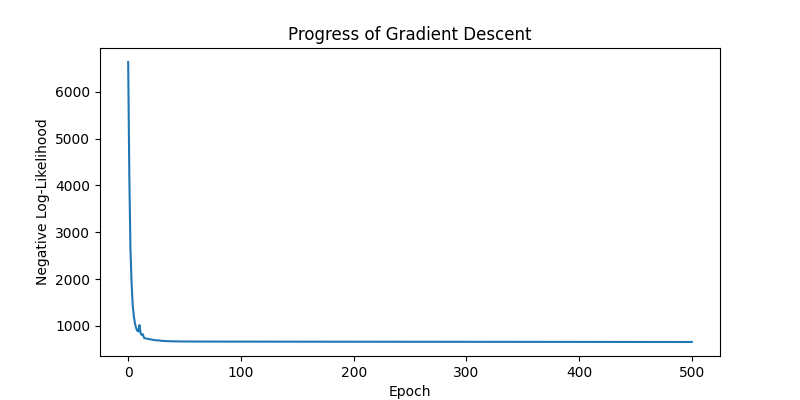

In [32]:
# look at how gradient descent made progess
# YOUR CODE HERE

# plotting our objective function for each epoch
plt.figure(figsize=(8, 4))
plt.plot(vz_gd, label="Negative Log-Likelihood")
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.title("Progress of Gradient Descent")
plt.show()

## 2d Stochastic gradient descent

In [33]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).

    # shuffling indices of samples without replacement:
    N = X.shape[0] 
    indices = np.random.permutation(N)  

    for i in indices:
        xi = X[i,:]
        yi = y[i]
        # calculating the gradient for a single data point i:
        ei = yi - sigma(w @ xi)
        gradient = ei * xi
        # updating weights:
        w += eps * gradient 

    return w

In [34]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [35]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [40]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

[np.float64(40.86497304569508),
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+0

In [41]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   962.118, eps=0.010500000
Epoch   2: f=   788.740, eps=0.011025000
Epoch   3: f=   740.064, eps=0.011576250
Epoch   4: f=   719.229, eps=0.012155063
Epoch   5: f=   710.387, eps=0.012762816
Epoch   6: f=   696.702, eps=0.013400956
Epoch   7: f=   701.895, eps=0.006700478
Epoch   8: f=   687.008, eps=0.007035502
Epoch   9: f=   684.234, eps=0.007387277
Epoch  10: f=   684.992, eps=0.003693639
Epoch  11: f=   680.431, eps=0.003878321
Epoch  12: f=   679.665, eps=0.004072237
Epoch  13: f=   678.588, eps=0.004275848
Epoch  14: f=   677.950, eps=0.004489641
Epoch  15: f=   677.117, eps=0.004714123
Epoch  16: f=   676.296, eps=0.004949829
Epoch  17: f=   676.928, eps=0.002474914
Epoch  18: f=   675.479, eps=0.002598660
Epoch  19: f=   674.814, eps=0.002728593
Epoch  20: f=   674.367, eps=0.002865023
Epoch  21: f=   673.953, eps=0.003008274
Epoch  22: f=   673.608, eps=0.003158688
Epoch  23: f=   673.312, eps=0.003316622
Epoch  24: f=   

## 2e Compare GD and SGD

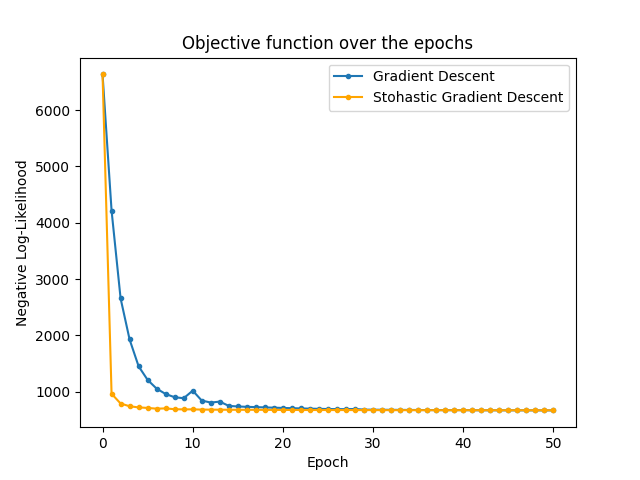

In [42]:
# YOUR CODE HERE
# plotting our objective function for each epoch
nextplot()
plt.plot(vz_gd[0:51], label="Gradient Descent", marker='.')
plt.plot(vz_sgd[0:51], label="Stohastic Gradient Descent", color = 'orange', marker='.')
plt.title("Objective function over the epochs")
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.legend()
plt.show()

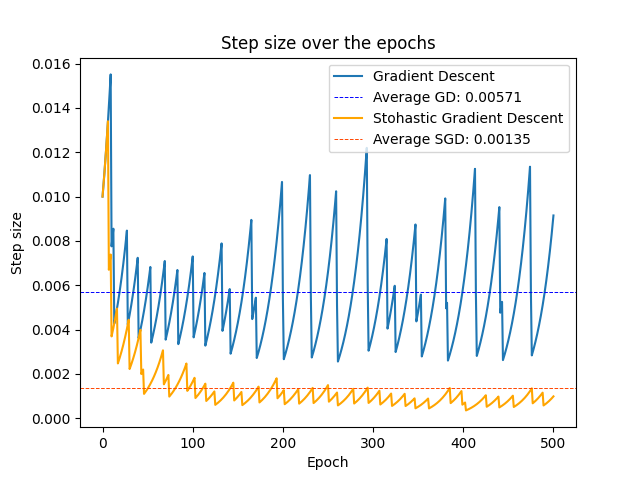

In [43]:
# plotting step size for each epoch
nextplot()
plt.plot(ez_gd, label="Gradient Descent")
plt.axhline(np.mean(ez_gd), color='blue', linestyle='--', lw = 0.7, label='Average GD: {:.5f}'.format(np.mean(ez_gd)))
plt.plot(ez_sgd, label="Stohastic Gradient Descent", color = 'orange')
plt.axhline(np.mean(ez_sgd), color='orangered', linestyle='--', lw = 0.7, label='Average SGD: {:.5f}'.format(np.mean(ez_sgd)))
plt.title("Step size over the epochs")
plt.xlabel("Epoch")
plt.ylabel("Step size")
plt.legend()
plt.show()

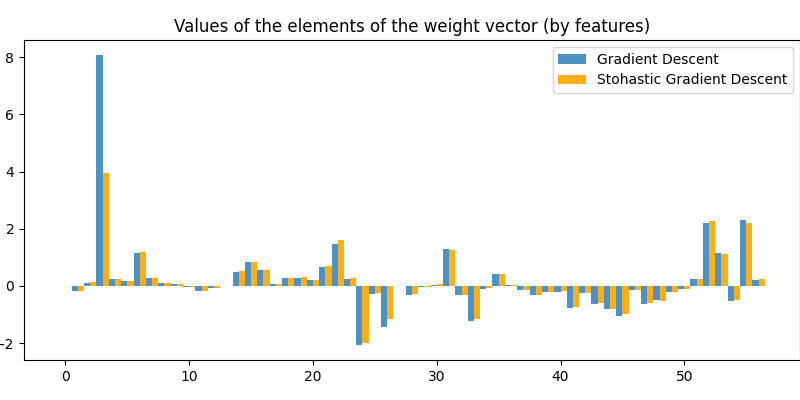

In [44]:
plt.figure(figsize=(8, 4))
barwidth = 0.5
plt.bar(np.arange(0,57)-barwidth/2, wz_gd, width=barwidth, label="Gradient Descent", alpha = 0.8)
plt.bar(np.arange(0,57)+barwidth/2, wz_sgd, width=barwidth, label="Stohastic Gradient Descent", color='orange', alpha=0.9)
plt.title("Values of the elements of the weight vector (by features)")
plt.subplots_adjust(left=0.03, right=1.0, top=0.90, bottom=0.1)
plt.legend()

# 3 Prediction

In [45]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    return sigma(Xtest @ w)


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    labels = (predict(Xtest, w) >= 0.5).astype(int)  # Convert boolean to int (0 or 1)
    
    return labels

In [46]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [49]:
yhat_s = predict(Xtestz, wz_sgd)
ypred_s = classify(Xtestz, wz_sgd)
print(sklearn.metrics.confusion_matrix(ytest, ypred_s)) 

[[886  55]
 [ 72 523]]


In [47]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



In [50]:
print(sklearn.metrics.classification_report(ytest, ypred_s))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       941
           1       0.90      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



Text(0, 0.5, 'Precision')

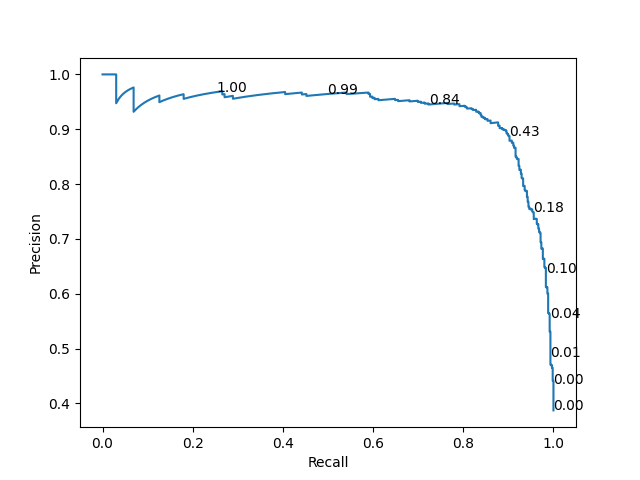

In [48]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

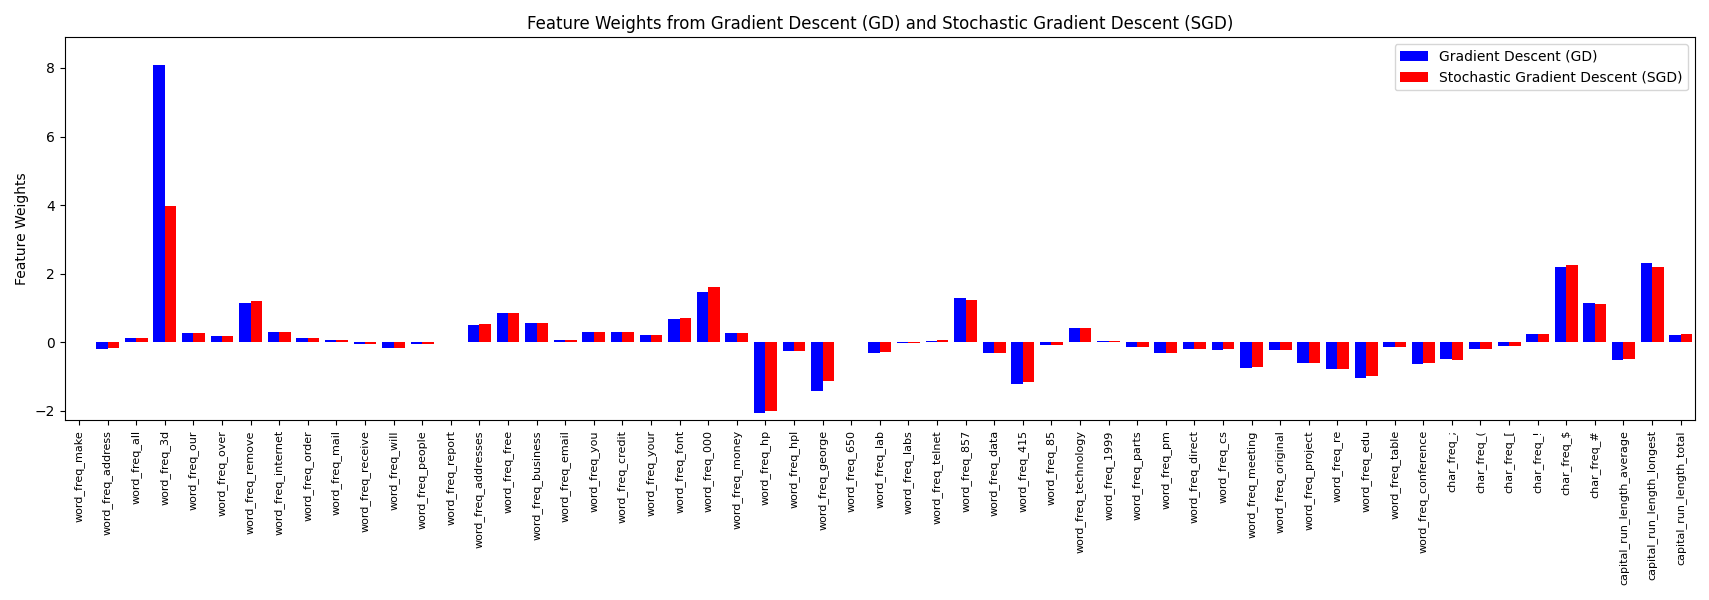

In [60]:
# Set up the plot
fig, ax = plt.subplots(figsize=(len(features) * 0.3, 6))  # Adjust width based on the number of features

# Define positions for the features along the x-axis
x_positions = np.arange(len(features))

# Plot the weights as vertical bars with offset for each feature
ax.bar(x_positions - 0.2, wz_gd, width=0.4, color='blue', label="Gradient Descent (GD)")
ax.bar(x_positions + 0.2, wz_sgd, width=0.4, color='red', label="Stochastic Gradient Descent (SGD)")

# Set feature names on the x-axis as ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(features, rotation=90, fontsize=8)  # Rotate for readability
ax.set_xlim(-0.5, len(features) - 0.5)

# Add labels and title
ax.set_ylabel("Feature Weights")
plt.title("Feature Weights from Gradient Descent (GD) and Stochastic Gradient Descent (SGD)")

# Set y-axis range to include both negative and positive weight values
min_weight = min(np.min(wz_gd), np.min(wz_sgd))
max_weight = max(np.max(wz_gd), np.max(wz_sgd))
ax.set_ylim([min_weight * 1.1, max_weight * 1.1])  # Add a little padding

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()  # Reduce whitespace for better fit
plt.show()

In [64]:
top_indices_gd = np.argsort(-np.abs(wz_gd))[:10]
top_indices_sgd = np.argsort(-np.abs(wz_sgd))[:10]
print(top_indices_gd)
print(top_indices_sgd)
top_features_gd = []
top_features_sgd = []
for i in top_indices_gd:
    top_features_gd.append(features[i])
for i in top_indices_sgd:
    top_features_sgd.append(features[i])
for i in range(10):
    print(top_features_gd[i], top_features_sgd[i])
                           

[ 3 55 52 24 22 26 31 33 53  6]
[ 3 52 55 24 22 31  6 33 26 53]
word_freq_3d word_freq_3d
capital_run_length_longest char_freq_$
char_freq_$ capital_run_length_longest
word_freq_hp word_freq_hp
word_freq_000 word_freq_000
word_freq_george word_freq_857
word_freq_857 word_freq_remove
word_freq_415 word_freq_415
char_freq_# word_freq_george
word_freq_remove char_freq_#


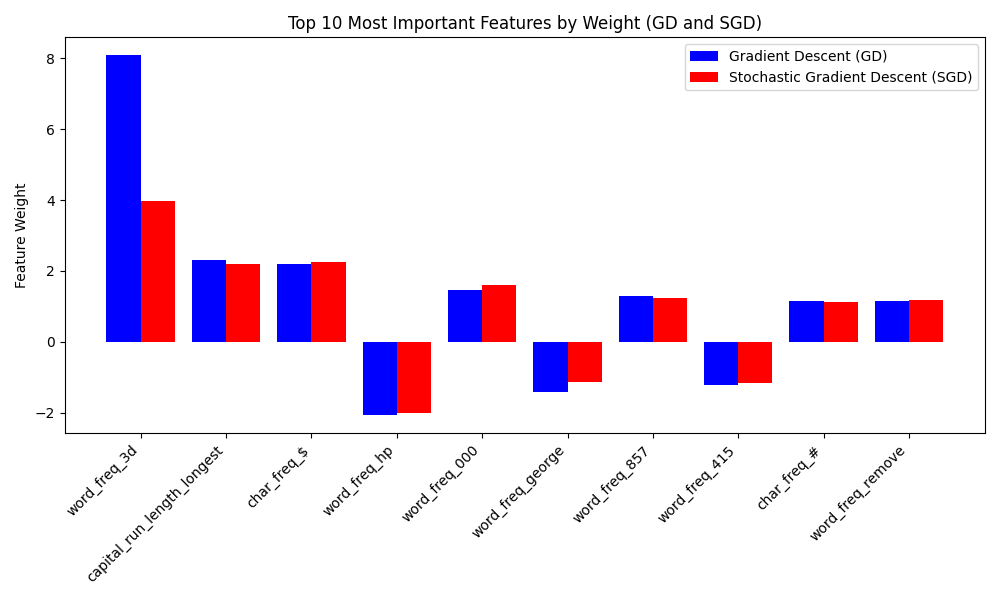

                      Feature  GD Weight  SGD Weight
0                word_freq_3d   8.086257    3.959374
9  capital_run_length_longest   2.313661    2.201234
7                 char_freq_$   2.189266    2.253886
3                word_freq_hp  -2.077676   -2.005854
2               word_freq_000   1.461747    1.608702
4            word_freq_george  -1.416146   -1.146550
5               word_freq_857   1.289500    1.241258
6               word_freq_415  -1.224868   -1.160125
8                 char_freq_#   1.154540    1.125167
1            word_freq_remove   1.153336    1.191355


In [61]:
import pandas as pd
# Calculate absolute weights and get top 10 indices for GD and SGD
top_indices_gd = np.argsort(-np.abs(wz_gd))[:10]
top_indices_sgd = np.argsort(-np.abs(wz_sgd))[:10]

# Combine top indices and remove duplicates
top_indices = np.unique(np.concatenate((top_indices_gd, top_indices_sgd)))

# Create a DataFrame for the top features
top_features = pd.DataFrame({
    'Feature': features[top_indices],
    'GD Weight': wz_gd[top_indices],
    'SGD Weight': wz_sgd[top_indices]
}).sort_values(by='GD Weight', key=abs, ascending=False)  # Sort by GD weight for display

# Plot the top features for both methods
plt.figure(figsize=(10, 6))
x = np.arange(len(top_features))
plt.bar(x - 0.2, top_features['GD Weight'], width=0.4, color='blue', label="Gradient Descent (GD)")
plt.bar(x + 0.2, top_features['SGD Weight'], width=0.4, color='red', label="Stochastic Gradient Descent (SGD)")
plt.xticks(x, top_features['Feature'], rotation=45, ha='right')
plt.ylabel("Feature Weight")
plt.title("Top 10 Most Important Features by Weight (GD and SGD)")
plt.legend()
plt.tight_layout()
plt.show()

# Display as a table
print(top_features)

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [51]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    #computing the log-likelihood
    log_likelihood = l(y, X, w)
    
    # introducing L2 regularization
    l2_penalty = lambda_/2 * (np.linalg.norm(w) ** 2)  
    
    # applying it to log-likelihood
    return log_likelihood - l2_penalty

In [52]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[np.float64(-47066.64166782577), np.float64(-47312.62381068291)]

In [53]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""

    # computing the gradient of log-likelihood
    gradient_likelihood = dl(y, X, w)
    
    # computing the gradient of the L2 regularization term
    gradient_l2 = lambda_ * w
    
    # applying it to log-likelihood gradient
    return gradient_likelihood - gradient_l2

In [54]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [55]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    
    def objective(w):
        return -l_l2(y, X, w, lambda_)  

    def update(w, eps):
        gradient = dl_l2(y, X, w, lambda_)
        return w + eps * gradient

    return (objective, update)

In [56]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  2949.163, eps=0.010000000
Epoch   1: f=  2110.532, eps=0.010500000
Epoch   2: f= 29446.188, eps=0.005250000
Epoch   3: f=  6209.244, eps=0.005512500
Epoch   4: f=  1469.678, eps=0.005788125
Epoch   5: f=  1151.084, eps=0.006077531
Epoch   6: f=  1862.219, eps=0.003038766
Epoch   7: f=  1711.211, eps=0.003190704
Epoch   8: f=  1064.763, eps=0.003350239
Epoch   9: f=  1043.572, eps=0.003517751
Epoch  10: f=  1082.838, eps=0.001758876
Epoch  11: f=  1008.957, eps=0.001846819
Epoch  12: f=   989.880, eps=0.001939160
Epoch  13: f=   988.698, eps=0.002036118
Epoch  14: f=   988.556, eps=0.002137924
Epoch  15: f=   988.526, eps=0.002244820
Epoch  16: f=   988.517, eps=0.002357061
Epoch  17: f=   988.514, eps=0.002474914
Epoch  18: f=   988.513, eps=0.002598660
Epoch  19: f=   988.513, eps=0.002728593
Epoch  20: f=   988.513, eps=0.002865023
Epoch  21: f=   988.513, eps=0.001432511
Epoch  22: f=   988.512, eps=0.001504137
Epoch  23: f=   988.512, eps=0.001579344
Epoch  24: f=   

## 4b Effect of Prior

In [ ]:
# YOUR CODE HERE

## 4c Composition of Weight Vector

In [ ]:
# YOUR CODE HERE

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [ ]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)